<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2: Generate descriptive statistics and visualizations

In [5]:
# For the "Median value of owner-occupied homes" provide a boxplot

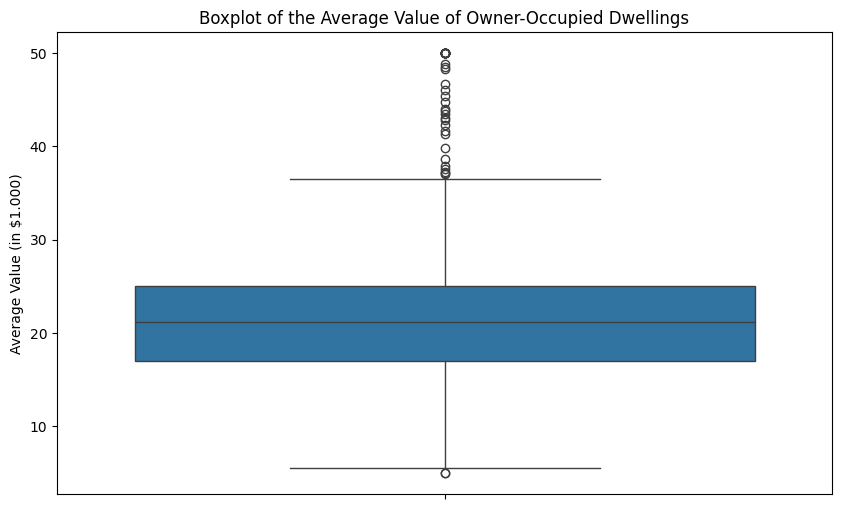

In [6]:
# Boxplot para MEDV
pyplot.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of the Average Value of Owner-Occupied Dwellings')
pyplot.ylabel('Average Value (in $1.000)')
pyplot.show()

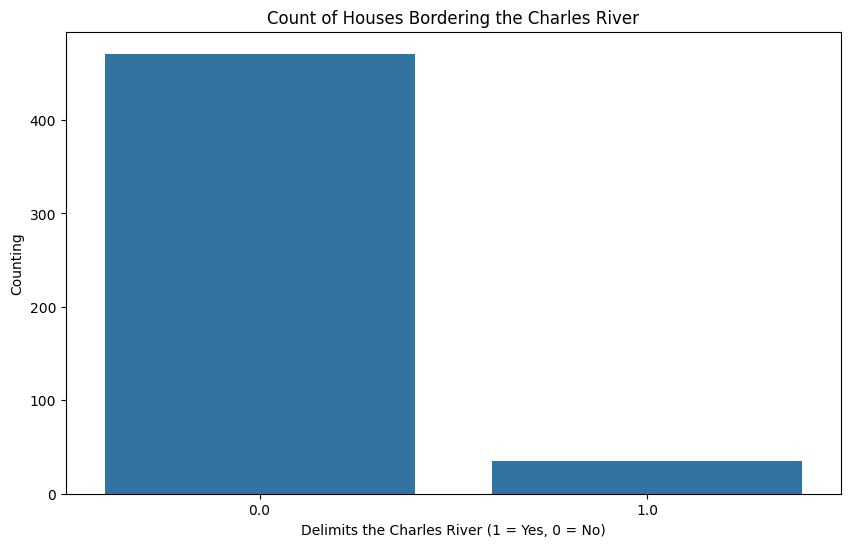

In [7]:
# Provide a  bar plot for the Charles river variable
pyplot.figure(figsize=(10, 6))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Count of Houses Bordering the Charles River')
pyplot.xlabel('Delimits the Charles River (1 = Yes, 0 = No)')
pyplot.ylabel('Counting')
pyplot.show()

In [8]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

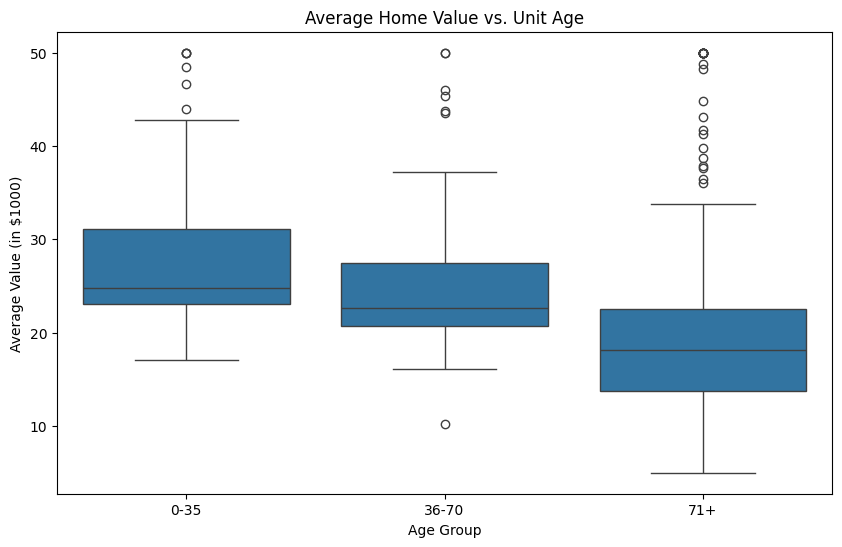

In [9]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '36-70', '71+'])

pyplot.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
pyplot.title('Average Home Value vs. Unit Age')
pyplot.xlabel('Age Group')
pyplot.ylabel('Average Value (in $1000)')
pyplot.show()

In [10]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

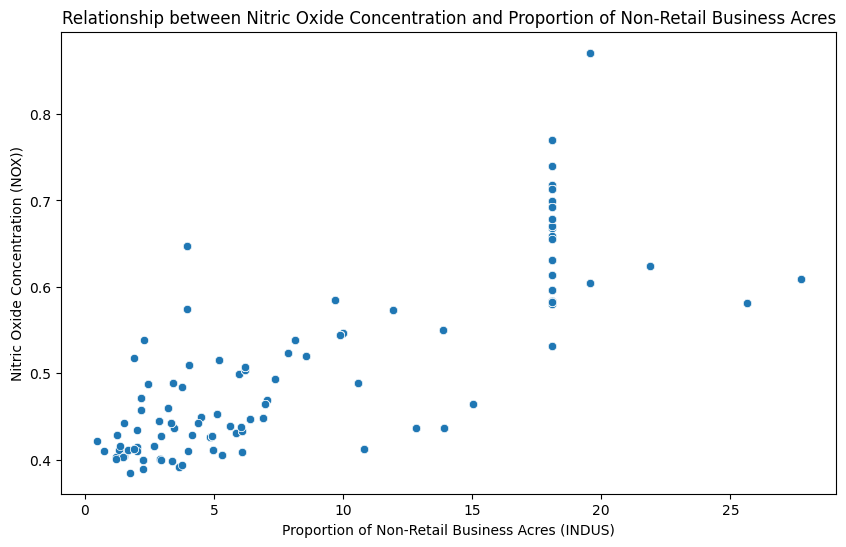

In [11]:
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('Relationship between Nitric Oxide Concentration and Proportion of Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX))')
pyplot.show()

In [12]:
# Create a histogram for the pupil to teacher ratio variable

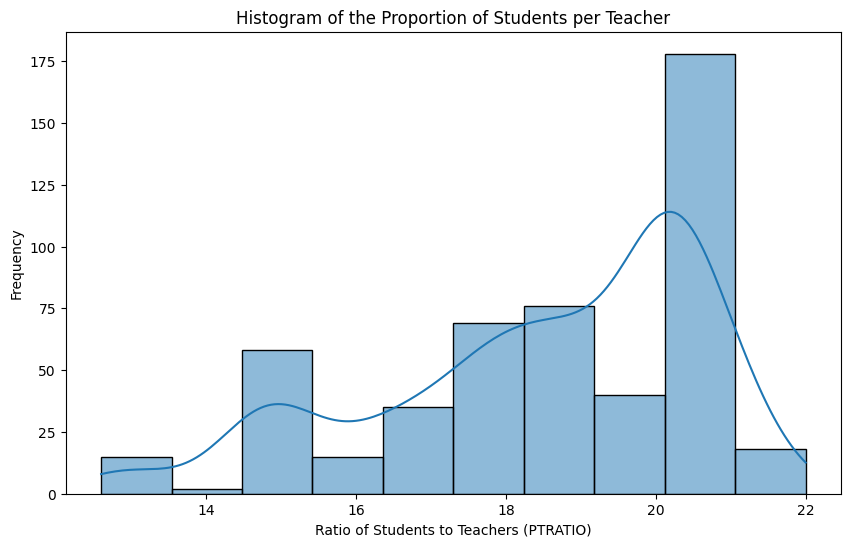

In [13]:
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
pyplot.title('Histogram of the Proportion of Students per Teacher')
pyplot.xlabel('Ratio of Students to Teachers (PTRATIO)')
pyplot.ylabel('Frequency')
pyplot.show()

## Task 3: Use the appropriate tests to answer the questions

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)







In [14]:
from scipy.stats import ttest_ind

In [15]:
# Hypothesis:
# H0: There is no significant difference in the average value of houses bordered by the Charles River (CHAS)
# H1: There is a significant difference in the average value of houses bordered by the Charles River (CHAS)

In [16]:
# Separate the groups

In [17]:
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

In [18]:
# Teste T

In [19]:
t_stat, p_value = ttest_ind(chas_0, chas_1)

print(f'Statistics t: {t_stat}')
print(f'Value p: {p_value}')

if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in the average value of the houses bordered by the Charles River.")
else:
    print("We did not reject the null hypothesis. There is no significant difference in the average value of the houses bordered by the Charles River.")

Statistics t: -3.996437466090509
Value p: 7.390623170519905e-05
We reject the null hypothesis. There is a significant difference in the average value of the houses bordered by the Charles River.


* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [20]:
from scipy.stats import f_oneway

In [21]:
# Hypothesis:
# H0: There is no significant difference in the average value of homes for different AGE groups
# H1: There is a significant difference in the average value of homes for different AGE groups

In [22]:
# Separate the groups

In [23]:
group1 = boston_df[boston_df['AGE_GROUP'] == '0-35']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '36-70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '71+']['MEDV']

In [24]:
# ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

In [25]:
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in the average value of homes for different age groups.")
else:
    print("We did not reject the null hypothesis. There is no significant difference in the average value of homes for different age groups.")

We reject the null hypothesis. There is a significant difference in the average value of homes for different age groups.


* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [26]:
from scipy.stats import pearsonr

In [27]:
# Hypothesis:
# H0: There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres
# H1: There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres

In [28]:
# Pearson correlation
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f'Correlation coefficient: {corr}')
print(f'p-value: {p_value}')

Correlation coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98


In [29]:
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres.")
else:
    print("We do not reject the null hypothesis. There is no significant relationship between nitric oxide concentrations and the proportion of non-retail business acres.")

We reject the null hypothesis. There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres.


* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [30]:
# Hypothesis:
# H0: The additional weighted distance to Boston's five employment centers has no impact on average home value
# H1: The additional weighted distance to Boston's five employment centers has an impact on the average home value

In [31]:
X = boston_df['DIS']
y = boston_df['MEDV']

In [32]:
X = sm.add_constant(X)

In [33]:
model = sm.OLS(y, X).fit()

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.21e-08
Time:                        00:45:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [35]:
coef = model.params['DIS']
p_value = model.pvalues['DIS']

print(f'Coefficient: {coef}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print("We reject the null hypothesis. The additional weighted distance to Boston's five job centers has a significant impact on the average home value.")
else:
    print("We do not reject the null hypothesis. The additional weighted distance to Boston's five job centers does not have a significant impact on the average home value.")

Coefficient: 1.091613015841107
p-value: 1.2066117273372235e-08
We reject the null hypothesis. The additional weighted distance to Boston's five job centers has a significant impact on the average home value.
